NucFreq/VerityMap flagged regions:  3623
Index(['contig', 'start', 'end', 'name', 'est_size', 'sample', 'region_type',
       'region_source', 'curated', 'ont_support', 'hifi_support', 'software',
       'read_source', 'region_start', 'region_end', 'hifi_MQ0_mean_cov',
       'hifi_MQ0_mean_cov_pct', 'hifi_MQ0_median_cov',
       'hifi_MQ0_median_cov_pct', 'hifi_MQ0_stddev_cov', 'hifi_MQ10_mean_cov',
       'hifi_MQ10_mean_cov_pct', 'hifi_MQ10_median_cov',
       'hifi_MQ10_median_cov_pct', 'hifi_MQ10_stddev_cov', 'ont_MQ0_mean_cov',
       'ont_MQ0_mean_cov_pct', 'ont_MQ0_median_cov', 'ont_MQ0_median_cov_pct',
       'ont_MQ0_stddev_cov', 'ont_MQ10_mean_cov', 'ont_MQ10_mean_cov_pct',
       'ont_MQ10_median_cov', 'ont_MQ10_median_cov_pct', 'ont_MQ10_stddev_cov',
       'nucfreq_median_het_ratio', 'nucfreq_num_hets', 'cluster_id',
       'cluster_start', 'cluster_end', 'cluster_span', 'snv_density_kbp',
       'num_nucfreq_regions', 'num_veritymap_regions', 'num_het_snv_hifi',
       '

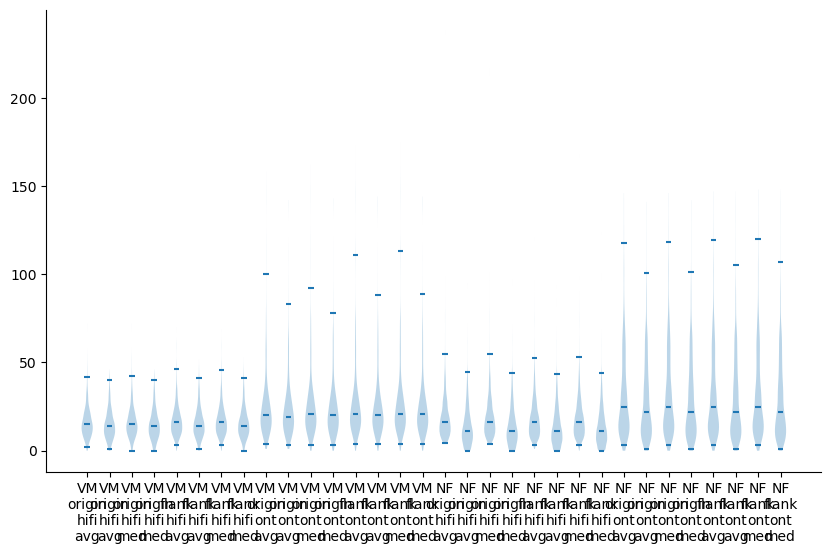

In [2]:
%run prep_flagged_regions.ipynb

print(regions.columns)

tools = ["VerityMap", "NucFreq"]
read_types = ["hifi", "ont"]
region_types = [["origin"], ["flank_3p", "flank_5p"]]
cov_types = ["mean_cov", "median_cov"]
mapq_t = [0, 10]

combinations = itt.product(
    tools, read_types,
    region_types, cov_types,
    mapq_t
)

plot_data = []
x_positions = []
data_labels = []
quantiles = []

x_pos = 0
for tool, reads, regtype, cov, mapq in combinations:
    x_pos += 1
    get_tool = regions["software"] == tool
    get_regtype = regions["region_type"].isin(regtype)
    if "origin" in regtype:
        region_label = "origin"
    else:
        region_label = "flank"
    tool_label = {"VerityMap": "VM", "NucFreq": "NF"}[tool]
    cov_label = {"mean_cov": "avg", "median_cov": "med"}[cov]
    cov_column = f"{reads}_MQ{mapq}_{cov}"
    plot_data.append(regions.loc[get_tool & get_regtype, cov_column].values)
    data_label = f"{tool_label}\n{region_label}\n{reads}\n{cov_label}"
    data_labels.append(data_label)
    x_positions.append(x_pos)
    quantiles.append((0.01,0.5,0.99))
    
fig, ax = plt.subplots(figsize=(10,6))

violins = ax.violinplot(
    plot_data,
    x_positions,
    showmeans=False,
    showmedians=False,
    showextrema=False,
    quantiles=quantiles
)

ax.set_xticks(x_positions)
ax.set_xticklabels(data_labels)

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)